# `problem statement`

## on the basis of several factors `predict the customer churn rate` on the given features by perform several kinds algorithms to select the best models

### Domain : `Telecom` 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading csv file
df=pd.read_csv("churn_dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# shape of dataframe
df.shape

(7043, 21)

In [5]:
# checking columns names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# convert the string values to  nan values
df["TotalCharges"] =   df["TotalCharges"].replace(' ',float("nan"))

In [4]:
# converting to float 
df["TotalCharges"] =df["TotalCharges"].astype("float")

In [5]:
df["TotalCharges"].dtype

dtype('float64')

In [6]:
df["TotalCharges"].isnull().sum()

11

In [7]:
print(df["TotalCharges"].mean())
print(df["TotalCharges"].median())

2283.3004408418697
1397.475


In [8]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].median())

In [9]:
# droping null values nan values with median
clean_df=df["TotalCharges"].dropna()

In [10]:
clean_df.isnull().sum()

0

In [11]:
# shape after removing null values
# print("with out null values",clean_df.shape)
print("with null values",df.shape)

with null values (7043, 21)


In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
clean_df.isnull().sum()

0

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# analysis of gender

In [15]:
# non visual univariate analysis
df["gender"].mode()

0    Male
Name: gender, dtype: object

In [16]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0.5, 1.0, 'bar plot of gender')

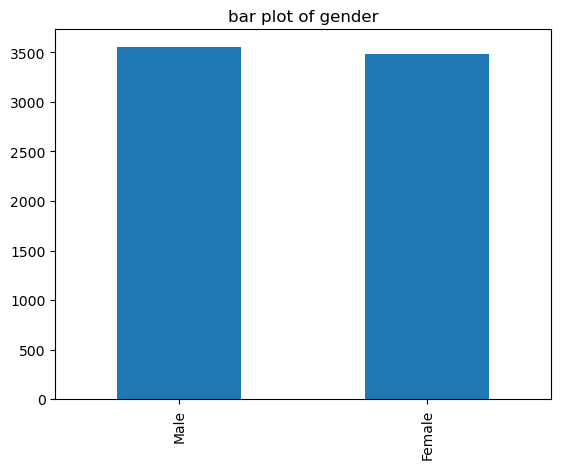

In [17]:
# visual univariate analysis
df["gender"].value_counts().plot(kind="bar")
plt.title("bar plot of gender")

# Insights
- The plot shows the count of male and female 
- the male count is 3555
- the female count is 3488

# anaysis of seniorcitizen

In [18]:
# non visual univariate analysis
print(df["SeniorCitizen"].min())
print(df["SeniorCitizen"].max())
print(df["SeniorCitizen"].mean())
print(df["SeniorCitizen"].median())
print(df["SeniorCitizen"].std())

print("the mean and median are so close to each others  may be no outliers")
print("unique values in Senoir citizen")

print(df["SeniorCitizen"].unique())

0
1
0.1621468124378816
0.0
0.36861160561002687
the mean and median are so close to each others  may be no outliers
unique values in Senoir citizen
[0 1]


Text(0.5, 1.0, 'box plot of seniorcitizens')

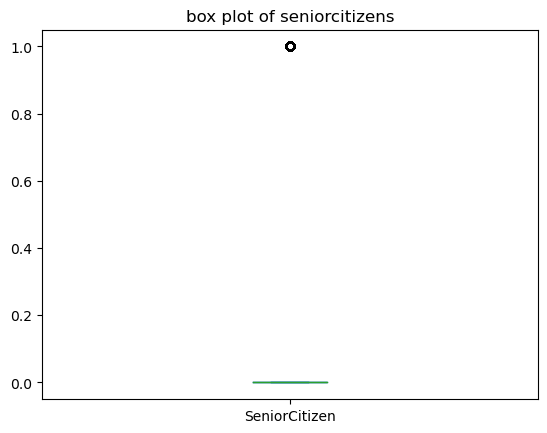

In [19]:
df["SeniorCitizen"].plot(kind="box")
plt.title("box plot of seniorcitizens")

# Insights
- one outlier is presentedin data 

Text(0.5, 1.0, 'kde plot of seniorcitizens')

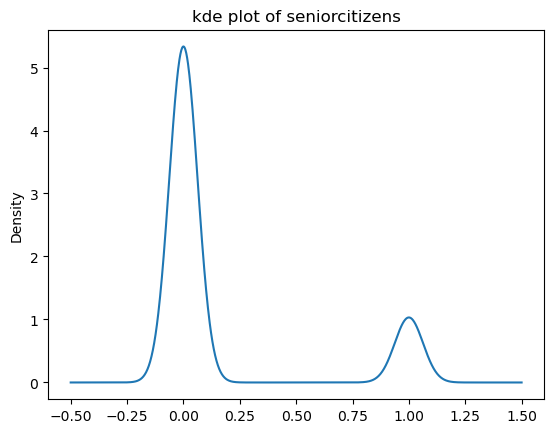

In [20]:
df["SeniorCitizen"].plot(kind="kde")
plt.title("kde plot of seniorcitizens")

In [21]:
# import scipy
from scipy import stats

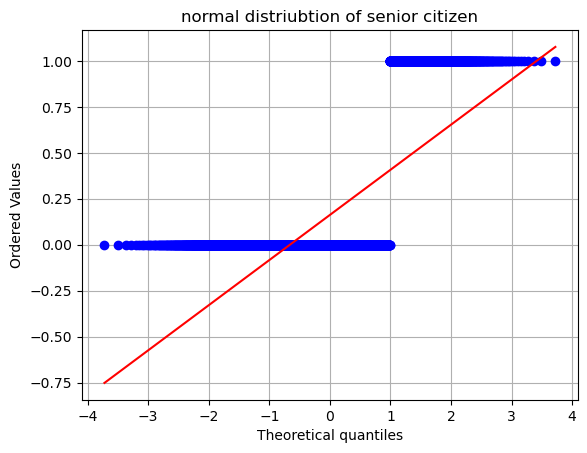

In [22]:
stats.probplot(df["SeniorCitizen"],dist="norm",plot=plt)
plt.title("normal distriubtion of senior citizen")
plt.grid()

# Insights
- this is not a uniform and  not a normal distribution
- The values are strats from negative so logtransformation can't apply

# analysis of Partner

In [23]:
# non visual analysis
df["Partner"].mode()

0    No
Name: Partner, dtype: object

In [24]:
df["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [25]:
# probability of partner
df["Partner"].value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

Text(0.5, 1.0, 'bar plot of partner')

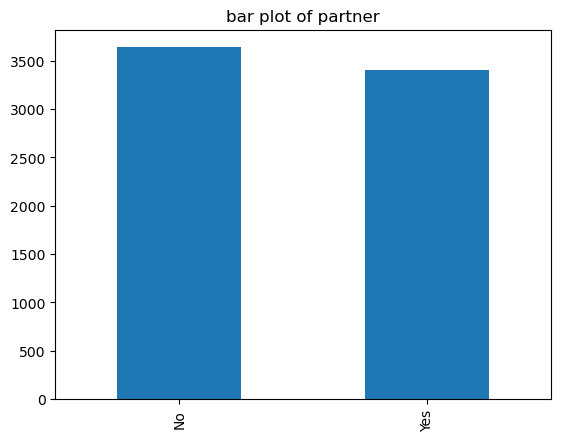

In [26]:
df["Partner"].value_counts().plot(kind="bar")
plt.title("bar plot of partner")

# Insights 
- In the data most of the people not have partner
- The count of not having 3641 and having partner count 3402

# analysis of Dependents

In [27]:
# non visual analysis of Dependents
df["Dependents"].mode()

0    No
Name: Dependents, dtype: object

In [28]:
df["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [29]:
# the probability of dependents
df["Dependents"].value_counts(normalize=True)
print("The most of the people not have dependents may be they are youngers")

The most of the people not have dependents may be they are youngers


Text(0.5, 1.0, ' bar plot of dependents ')

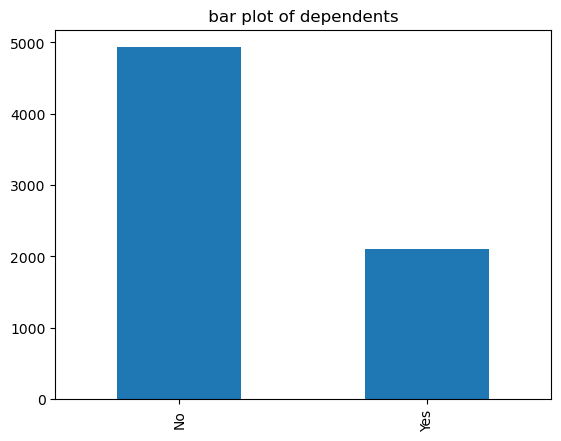

In [30]:
df["Dependents"].value_counts().plot(kind="bar")
plt.title(" bar plot of dependents ")

# Insights
- The most of the people are not have dependents may be they are youngers

# analysis of tenure

In [31]:
# non visual analysis of tenure
print(df["tenure"].min())
print(df["tenure"].max())
print(df["tenure"].mean())
print(df["tenure"].median())
print(df["tenure"].std())

0
72
32.37114865824223
29.0
24.55948102309423


Text(0.5, 1.0, 'box plot of tenure')

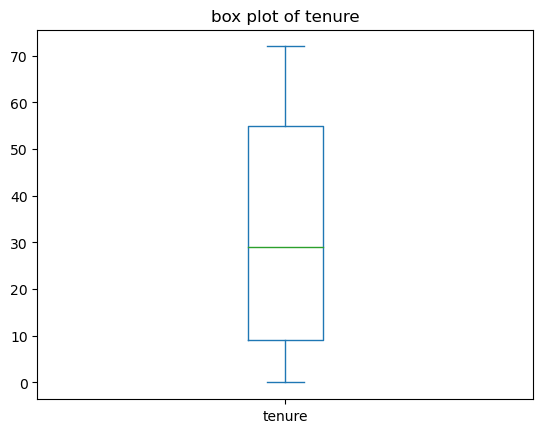

In [32]:
# box plot for  outliers
df["tenure"].plot(kind="box")
plt.title("box plot of tenure")

# Insights
- There are no outliers are in the data
- The average tenure is 29

Text(0.5, 1.0, 'kde plot of tenure')

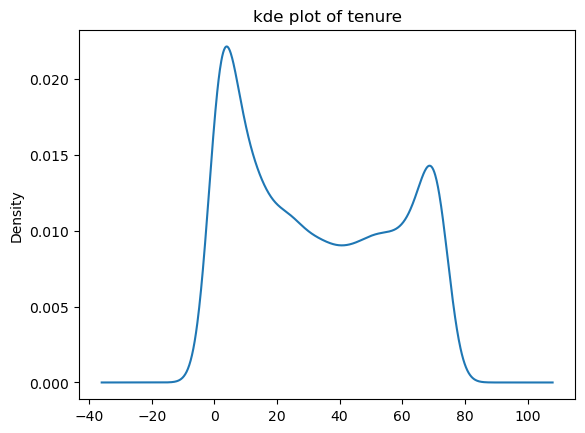

In [105]:
# kde plot for  outliers
df["tenure"].plot(kind="kde")
plt.title("kde plot of tenure")

# Insights
- The kde plot is not anormal distribution
- there is skewness 0.2395397495619829

In [106]:
df["tenure"].skew()

0.2395397495619829

In [63]:
y_t,l=stats.boxcox(df["tenure"])
print(l)

ValueError: Data must be positive.

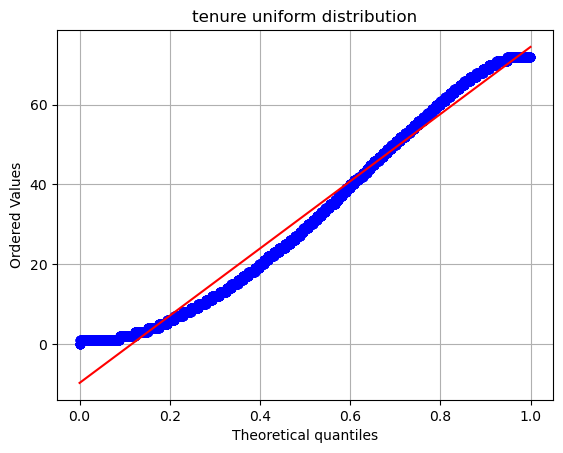

In [110]:
# qq plot of tenure of uniform
stats.probplot(df["tenure"],dist="uniform",plot=plt)
plt.title("tenure uniform distribution")
plt.grid()

# Insights
- The plot looks to be uniform distribution 
- Some are not touched to line

# analysis of PhoneService

In [102]:
# non visual analysis of PhoneService
df["PhoneService"].mode()

0    Yes
Name: PhoneService, dtype: object

In [103]:
df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [104]:
df["PhoneService"].value_counts(normalize=True)

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64

Text(0.5, 1.0, 'bar plot of phone service')

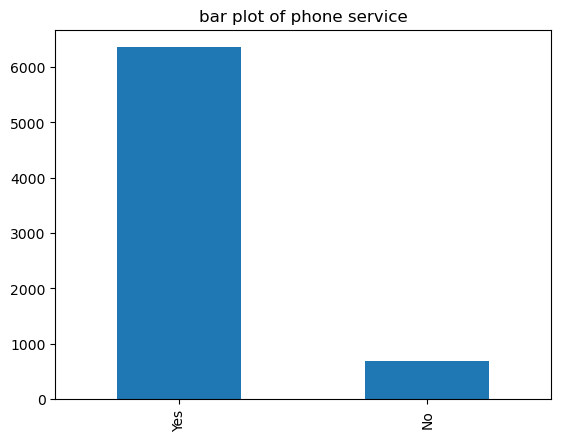

In [111]:
df["PhoneService"].value_counts().plot(kind="bar")
plt.title("bar plot of phone service")

# Insights
- There  are few people are not usins pnonservices  count of   682
- The most of the people are using Yes    6361

# analysis of MultipleLines

In [112]:
df["MultipleLines"].mode()

0    No
Name: MultipleLines, dtype: object

In [113]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [114]:
df["MultipleLines"].value_counts(normalize=True)

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64

Text(0.5, 1.0, 'bar plot of MultipleLines')

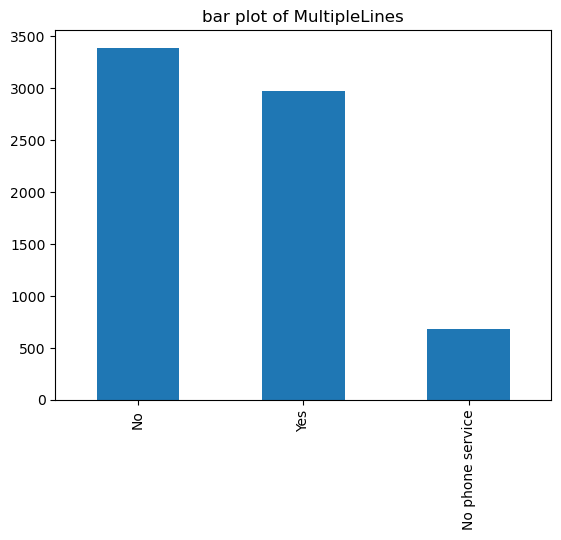

In [115]:
df["MultipleLines"].value_counts().plot(kind="bar")
plt.title("bar plot of MultipleLines")

# Insights
- Most of the people are not have multiple line with count  3390 ,probability 0.481329
- And people are having multiple lines 2971 ,probability 0.421837
- and some other have no phone services 682 ,probability  0.096834

# analysis of InternetService

In [116]:
df["InternetService"].mode()

0    Fiber optic
Name: InternetService, dtype: object

In [117]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [118]:
df["InternetService"].value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

Text(0.5, 1.0, 'bar plot of InternetService')

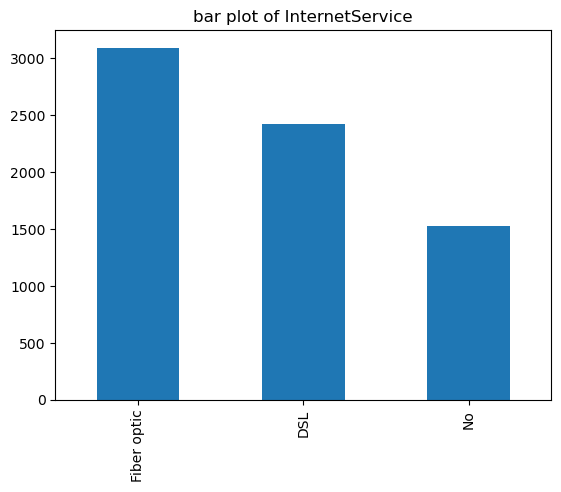

In [119]:
df["InternetService"].value_counts().plot(kind="bar")
plt.title("bar plot of InternetService")

# Insights
- The majority people are using optical fiber 3096 and probability is  0.439585
- The dsl is used by some people 2421 probability  is 0.343746
- some people are not using internet 1523 and probability is  0.216669

# analysis of OnlineSecurity

In [133]:
df["OnlineSecurity"].mode()

0    No
Name: OnlineSecurity, dtype: object

In [134]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [135]:
df["OnlineSecurity"].value_counts(normalize=True)

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64

<AxesSubplot:>

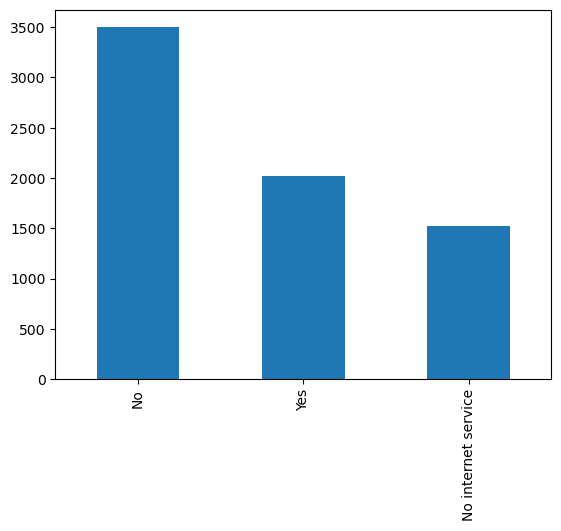

In [136]:
df["OnlineSecurity"].value_counts().plot(kind="bar")

# Insights
- The most of the people are not having OnlineSecurity 3498
- 2019 people having OnlineSecurity and some other didn't have 1526

# analysis of OnlineBackup

In [137]:
df["OnlineBackup"].mode()

0    No
Name: OnlineBackup, dtype: object

In [138]:
df["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [139]:
df["OnlineBackup"].value_counts(normalize=True)

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64

Text(0.5, 1.0, 'bar plot of OnlineBackup')

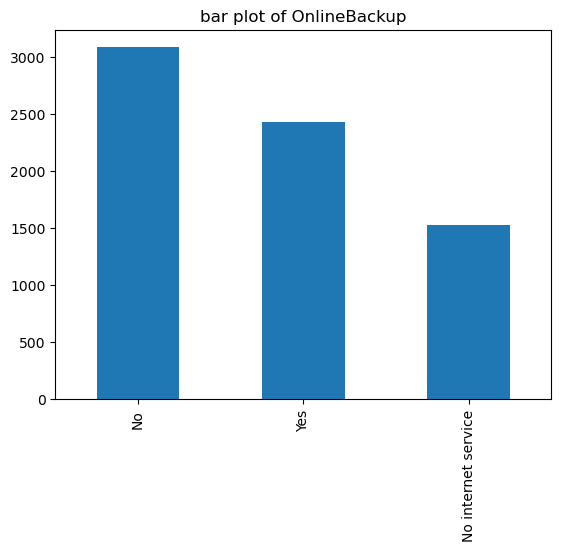

In [140]:
df["OnlineBackup"].value_counts().plot(kind="bar")
plt.title("bar plot of OnlineBackup")

# Insights
- The most of the people are don't have online backup and 1500 people are don't have internet service

# analysis of DeviceProtection

In [141]:
df["DeviceProtection"].mode()

0    No
Name: DeviceProtection, dtype: object

In [142]:
df["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [143]:
df["DeviceProtection"].value_counts(normalize=True)

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64

Text(0.5, 1.0, 'bar plot of  DeviceProtection')

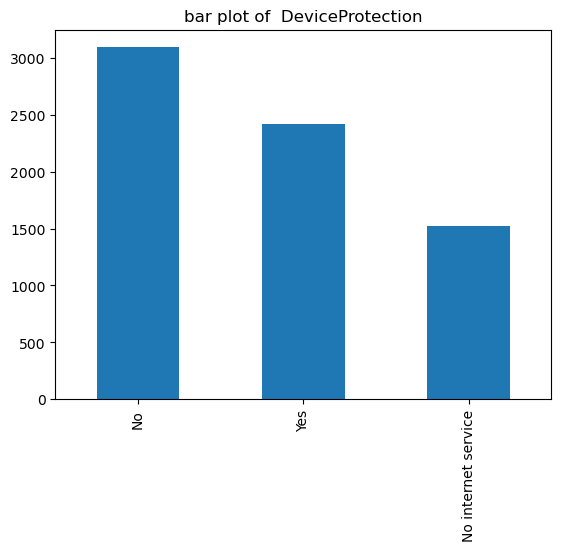

In [144]:
df["DeviceProtection"].value_counts().plot(kind="bar")
plt.title("bar plot of  DeviceProtection")

# Insights
- The most of the people are don't have device protection above 3000
- and 1500 people are don't have internet service

# anlysis of TechSupport

In [145]:
df["TechSupport"].mode()

0    No
Name: TechSupport, dtype: object

In [146]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [147]:
df["TechSupport"].value_counts(normalize=True)

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64

Text(0.5, 1.0, 'bar plot of  TechSupport')

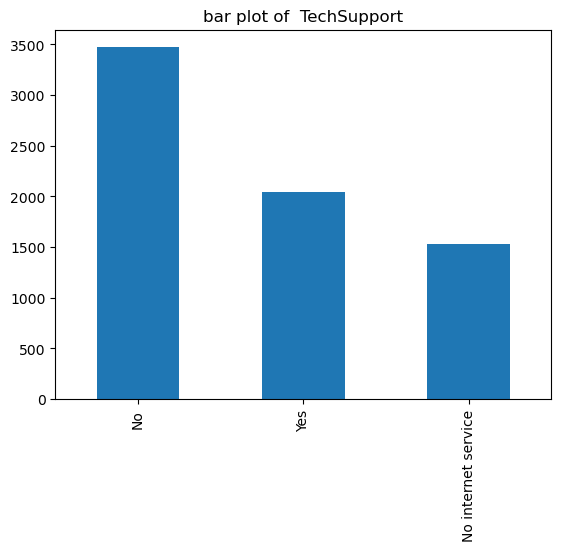

In [149]:
df["TechSupport"].value_counts().plot(kind="bar")
plt.title("bar plot of  TechSupport")

# Insights
- The most of the people are don't have tech support above 3000
- tech support people are above 2000
- and 1500 people are don't have internet service

# analysis of  StreamingTV

In [120]:
df["StreamingTV"].mode()

0    No
Name: StreamingTV, dtype: object

In [124]:
df["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [122]:
df["StreamingTV"].value_counts(normalize=True)

No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64

Text(0.5, 1.0, ' bar plot of StreamingTV')

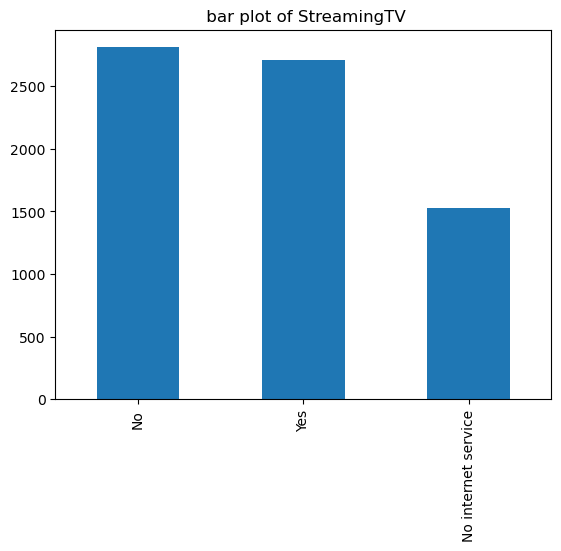

In [123]:
df["StreamingTV"].value_counts().plot(kind="bar")
plt.title(" bar plot of StreamingTV")

# insights
- The streaming tv count is 2707 and unstreamed count of 2810 these are higher than streamed people
- The no internet service people having count os 1526

# analysis of StreamingMovies

In [127]:
df["StreamingMovies"].mode()

0    No
Name: StreamingMovies, dtype: object

In [128]:
df["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [129]:
df["StreamingMovies"].value_counts(normalize=True)

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64

Text(0.5, 1.0, 'bar plot of  StreamingMovies')

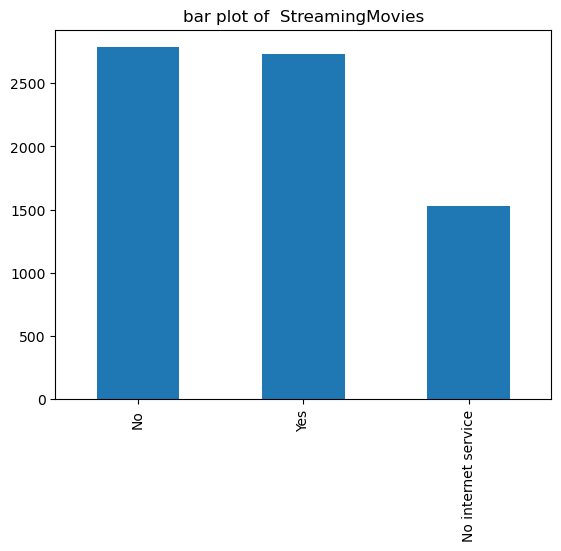

In [130]:
df["StreamingMovies"].value_counts().plot(kind="bar")
plt.title("bar plot of  StreamingMovies")

# Insights
- The streaming tv and streaming movies are  simliar  in proportion and  probability

# analysis of Contract

In [150]:
df["Contract"].mode()

0    Month-to-month
Name: Contract, dtype: object

In [151]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [152]:
df["Contract"].value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

Text(0.5, 1.0, 'bar plot of  Contract')

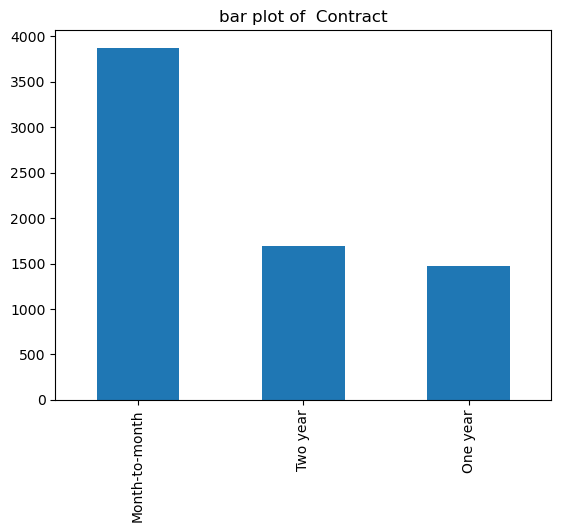

In [153]:
df["Contract"].value_counts().plot(kind="bar")
plt.title("bar plot of  Contract")

# Insights
-  The most of the people are undr the month to month category 
-  The two years and one year are similar 

# analysis of PaperlessBilling

In [154]:
df["PaperlessBilling"].mode()

0    Yes
Name: PaperlessBilling, dtype: object

In [155]:
df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [156]:
df["PaperlessBilling"].value_counts(normalize=True)

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

Text(0.5, 1.0, 'bar plot of PaperlessBilling ')

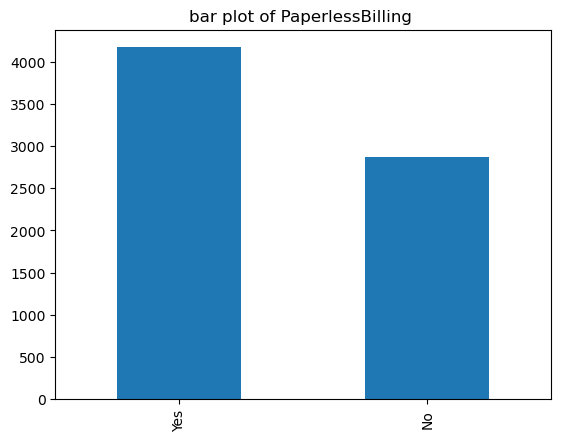

In [157]:
df["PaperlessBilling"].value_counts().plot(kind="bar")
plt.title("bar plot of PaperlessBilling ")

# Insights 
- The most of he people are done  PaperlessBilling 4171
- PaperlessBilling not done by 2872

# analysis of PaymentMethod

In [160]:
df["PaymentMethod"].mode()

0    Electronic check
Name: PaymentMethod, dtype: object

In [161]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [162]:
df["PaymentMethod"].value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

Text(0.5, 1.0, 'bar plot of  payment method')

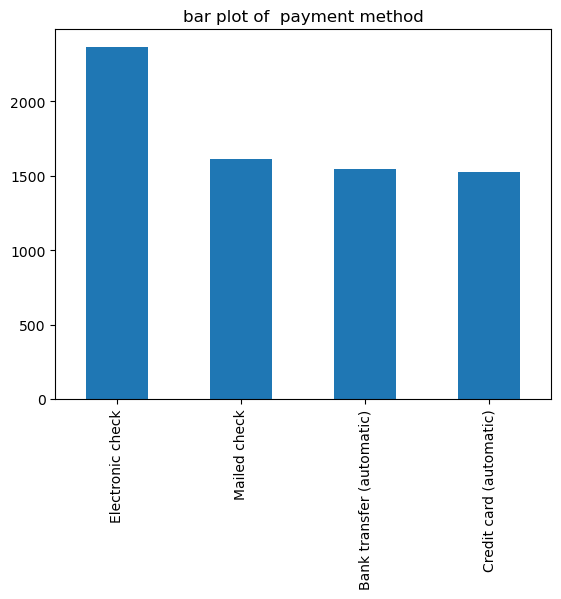

In [163]:
df["PaymentMethod"].value_counts().plot(kind="bar")
plt.title("bar plot of  payment method")

# Insights
- The most of using electronic check  2365
- And other payments are at similar range

# analysis of MonthlyCharges

In [165]:
print(df["MonthlyCharges"].min())
print(df["MonthlyCharges"].max())
print(df["MonthlyCharges"].mean())
print(df["MonthlyCharges"].median())
print(df["MonthlyCharges"].std())
print(" the mean and median are some difference so their may be outliers ")

18.25
118.75
64.76169246059922
70.35
30.09004709767854
 the mean and median are some difference so their may be outliers 


Text(0.5, 1.0, 'box plot of  MonthlyCharges')

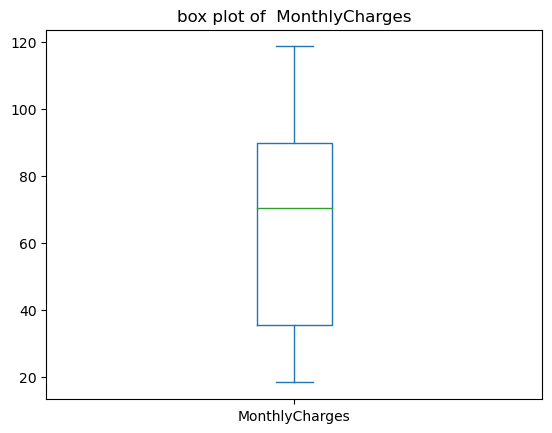

In [167]:
df["MonthlyCharges"].plot(kind="box")
plt.title("box plot of  MonthlyCharges")

# Insights 
- There are no outliers  in MonthlyCharges
- The average  MonthlyCharges is around 70

Text(0.5, 1.0, 'kde plot of  MonthlyCharges')

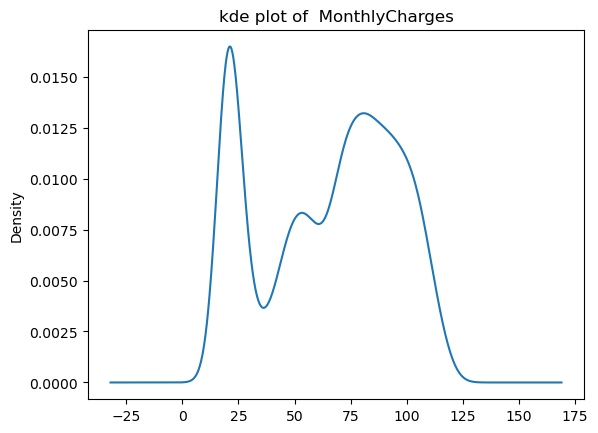

In [168]:
df["MonthlyCharges"].plot(kind="kde")
plt.title("kde plot of  MonthlyCharges")

# Insights
- The kde looks assymmetric 
- The skewnwness is 0.22052443394398033
- The  distributiopn starts from negative

In [169]:
df["MonthlyCharges"].skew()

-0.22052443394398033

Text(0.5, 1.0, 'uniform distribution plot of MonthlyCharges')

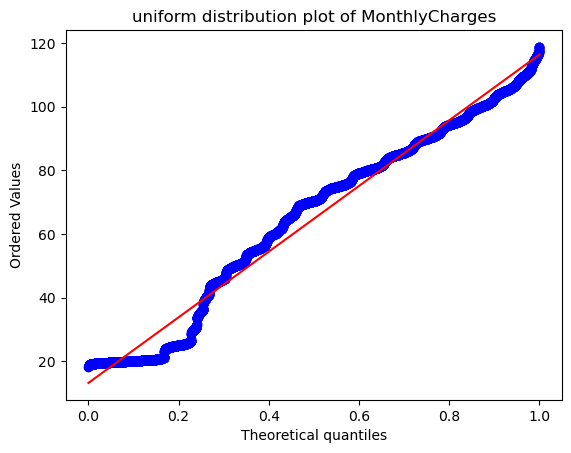

In [172]:
# qq plot of distribution MonthlyCharges
stats.probplot(df["MonthlyCharges"],dist="uniform",plot=plt)
plt.title("uniform distribution plot of MonthlyCharges")

# Insights 
- The distribution is similar to uniform  but some points are not touching line


# analysis of total charges

In [ ]:
# to convert the dtype to int or float 

In [37]:
# with median imputation
print(df["TotalCharges"].min())
print(df["TotalCharges"].max())
print(df["TotalCharges"].mean())
print(df["TotalCharges"].median())
print(df["TotalCharges"].std())

18.8
8684.8
2281.9169281556187
1397.475
2265.2703984821865


In [40]:
#  after nan values removing
print(clean_df.min())
print(clean_df.max())
print(clean_df.mean())
print(clean_df.median())
print(clean_df.std())

18.8
8684.8
2283.3004408418697
1397.475
2266.7713618831453


Text(0.5, 1.0, 'box plot of total charges')

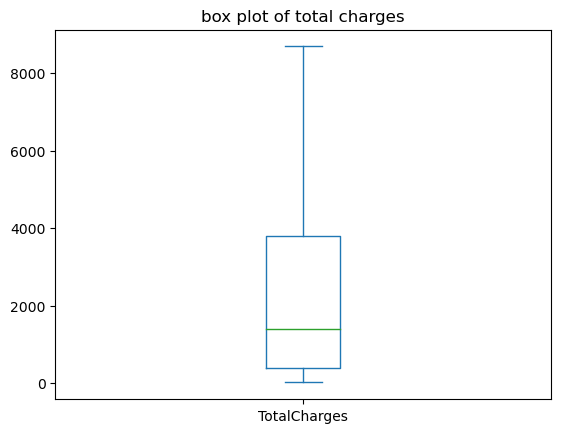

In [42]:
df["TotalCharges"].plot(kind="box")
plt.title("box plot of total charges")

# Insights
- There are no outliers in data
- The average total charges around 1399

Text(0.5, 1.0, 'kde plot of total charges')

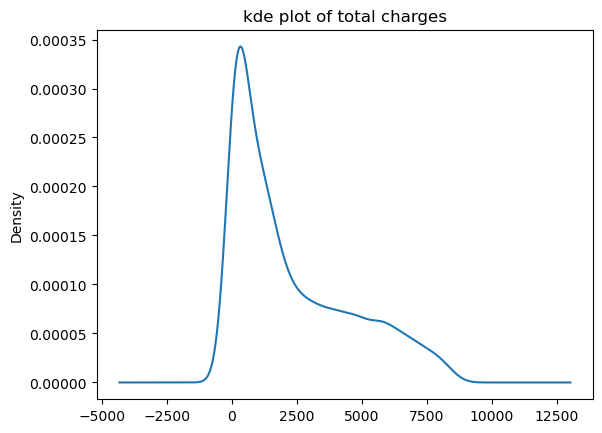

In [43]:
df["TotalCharges"].plot(kind="kde")
plt.title("kde plot of total charges")

In [44]:
df["TotalCharges"].skew()

0.9637890936414893

#  insights 
- The kde plot of distribution most of the under 0 to 2000
- The plot shows the skewness of 0.9637890936414893

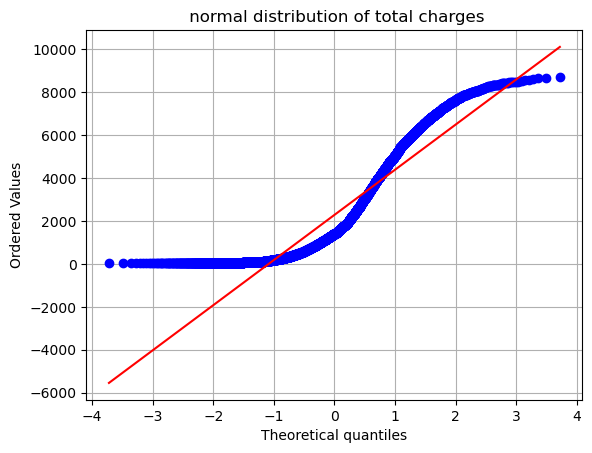

In [50]:
stats.probplot(df["TotalCharges"],dist="norm",plot=plt)
plt.title(" normal distribution of total charges")
plt.grid()

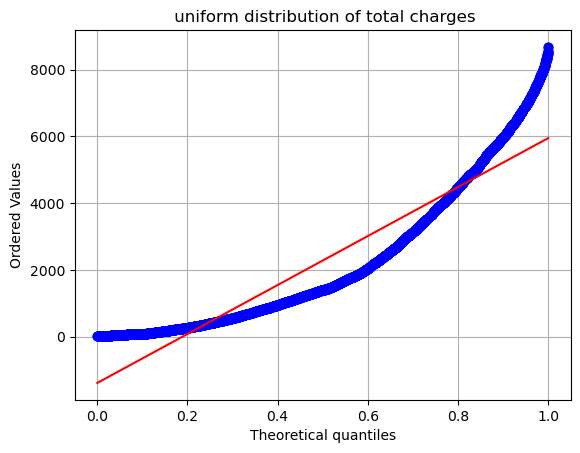

In [51]:
stats.probplot(df["TotalCharges"],dist="uniform",plot=plt)
plt.title(" uniform distribution of total charges")
plt.grid()

# Insights

In [49]:
#  apply log transformation of Total charges
x_t,l=stats.boxcox(df['TotalCharges'])
print(l)

0.255009116735573


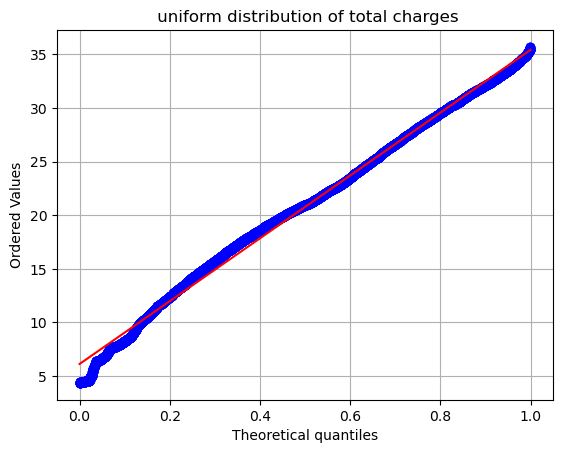

In [55]:
# after apply box cox technique
stats.probplot(x_t,dist="uniform",plot=plt)
plt.title(" uniform distribution of total charges")
plt.grid()

# Insights
- After boxcox transformation all dots on the line 
- This is uniform distribution

# analysis of churn

In [173]:
df["Churn"].mode()

0    No
Name: Churn, dtype: object

In [174]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [175]:
df["Churn"].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

Text(0.5, 1.0, 'bar plot of Churn')

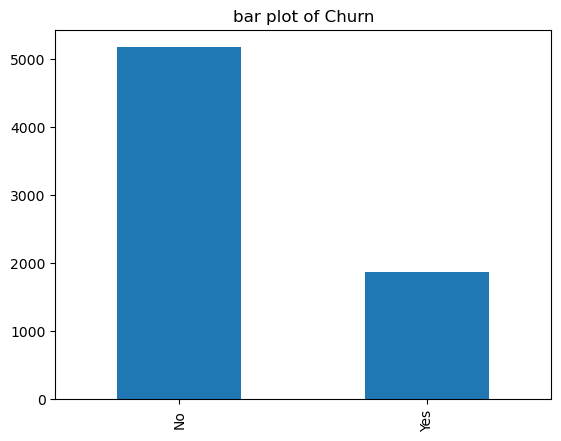

In [176]:
df["Churn"].value_counts().plot(kind="bar")
plt.title("bar plot of Churn")

# Insights 
- The most of the people are not satisfied by services  the no count 5174 ,probability 0.73463
  
- The  satisfied people are 1869 ,probability  0.26537


In [46]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


# Insights
- The corelation states the how the target variable are impacted by independent
  variable between the columns
- The total charges and tenure have high corelation 0.825464    

#  non- visual multivariate analysis :

In [57]:
# non visual multivariate analysis
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


In [64]:
df.skew()

C:\Users\HAREESH\AppData\Local\Temp\ipykernel_7864\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

In [65]:
df.kurt()

C:\Users\HAREESH\AppData\Local\Temp\ipykernel_7864\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


SeniorCitizen     1.362596
tenure           -1.387372
MonthlyCharges   -1.257260
TotalCharges     -0.226400
dtype: float64

In [66]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [67]:
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


# bivariate visual analysis
### num v/s num

In [27]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


Text(0.5, 1.0, 'scatter plot of tenure and senior citizen')

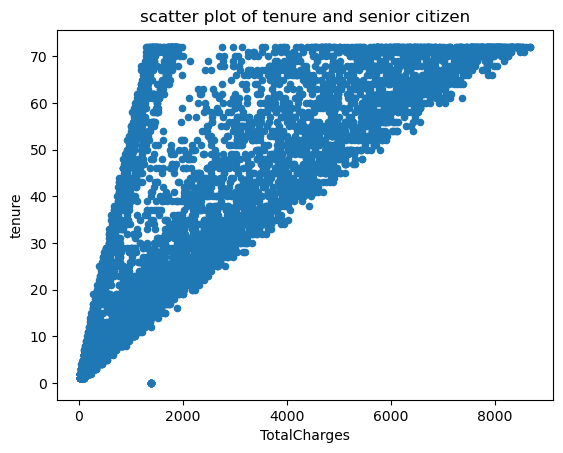

In [22]:
# scatter plot 
df.plot(x="TotalCharges",y="tenure",kind="scatter")
plt.title("scatter plot of tenure and senior citizen")

# Insights
- The total charges and  tenure high positive relation
- If the tenure is increased then total charges are also increasing
- The corelation ofthese two columns 0.825464	

Text(0.5, 1.0, 'scatter plot of tenure and senior citizen')

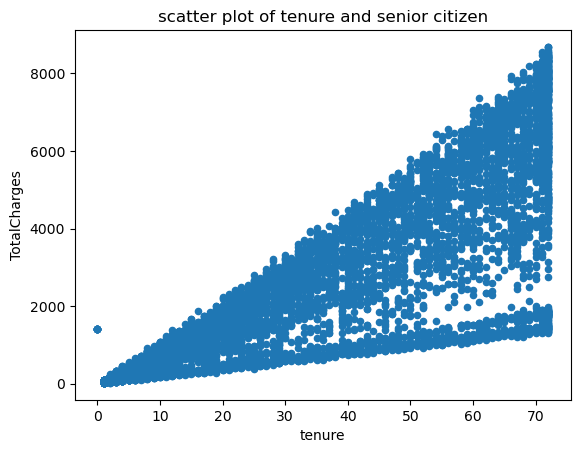

In [25]:
# scatter plot 
df.plot(y="TotalCharges",x="tenure",kind="scatter")
plt.title("scatter plot of tenure and senior citizen")

Text(0.5, 1.0, 'scatter plot of tenure and senior citizen')

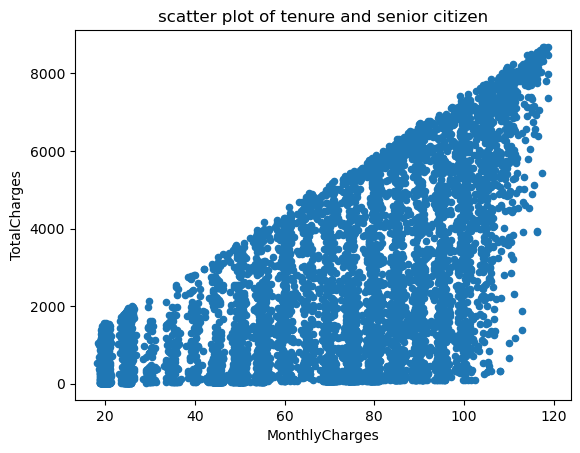

In [24]:
# scatter plot 
df.plot(y="TotalCharges",x="MonthlyCharges",kind="scatter")
plt.title("scatter plot of tenure and senior citizen")

# Insights
- The monthly charges and total charges both are positive corelated
- The monthly charges are inccreased then total charges are increased
- The corelation  is 0.650864

# analysis of churn and seniorcitizen

Text(0.5, 1.0, 'boxplot of churn and senior citizen')

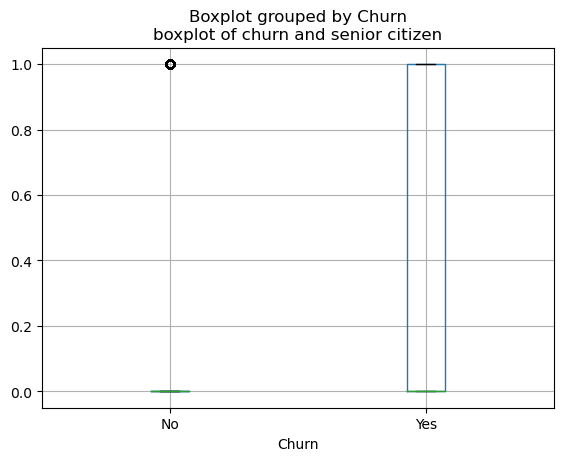

In [59]:
# bivariate analysis
df.boxplot(by="Churn",column="SeniorCitizen")
plt.title("boxplot of churn and senior citizen")

# Insights 
- The maximum seniorcitizens are churn from service provider
- In that one oulier in no churn

# analysis of churn andd tenure

Text(0.5, 1.0, 'boxplot of churn and tenure')

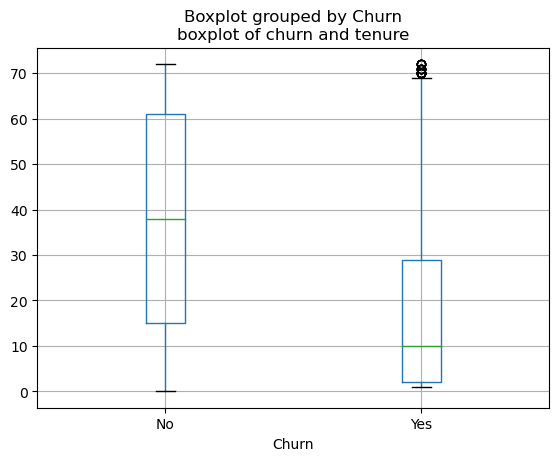

In [61]:
# bivariate analysis
df.boxplot(by="Churn",column="tenure")
plt.title("boxplot of churn and tenure")

# Insights
- Ther are some outliers are tenure yes 
- average churn is 10 after they are churn from provider
- The non churn average is between 35 to 40 and these are more than churn yes in tenure

# analysis of churn and MonthlyCharges 

Text(0.5, 1.0, 'boxplot of churn and MonthlyCharges ')

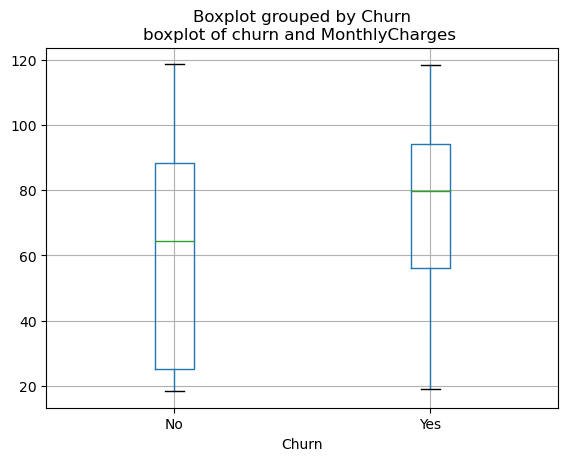

In [68]:
# bivariate analysis
df.boxplot(by="Churn",column="MonthlyCharges")
plt.title("boxplot of churn and MonthlyCharges ")

# Insights
- The churn yes people average monthly charges 80
- The churn no people average charges are  above 60
- the churn yes charges are  high to compare churn no that's the reason to churn 


# analysis of churn and TotalCharges

Text(0.5, 1.0, 'boxplot of churn and TotalCharges  ')

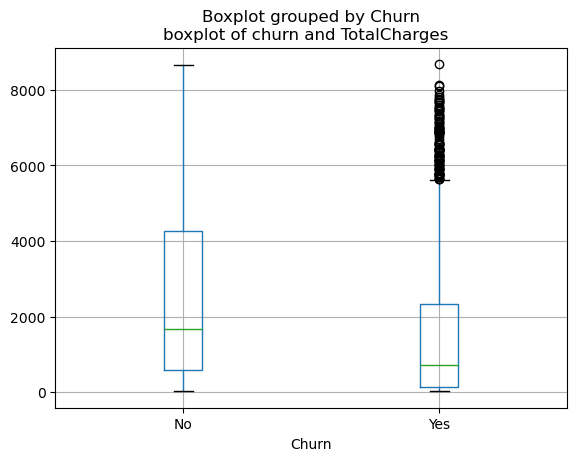

In [70]:
# bivariate analysis
df.boxplot(by="Churn",column="TotalCharges")
plt.title("boxplot of churn and TotalCharges  ")

# Insights
- Under total charges churn yes have many outliers and average total charges are 800
- The most of the people are not churn  and there average spend on 1700   

# bivariate categoric v/s categoric
 ##  analysis of churn and  gender

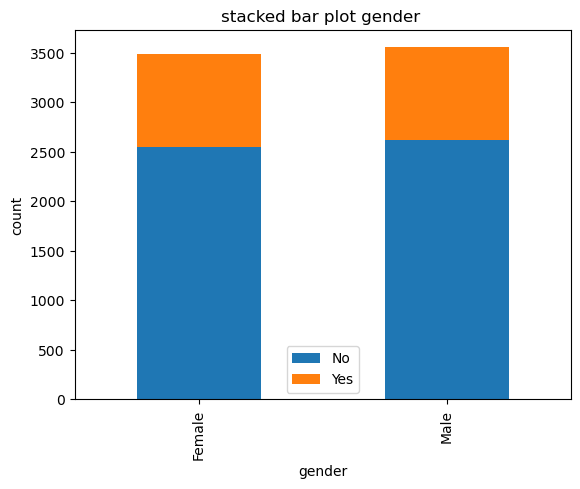

In [37]:
# stacked barplot cat v/s cat
a=df.groupby(['gender','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot gender ")
plt.xlabel("gender")
plt.ylabel("count")
plt.legend()

# Insights 
- In gender both male and female are churn at 2500

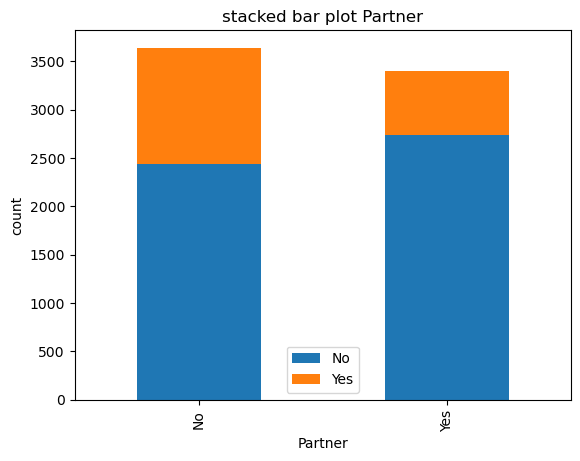

In [38]:
# stacked barplot cat v/s cat
a=df.groupby(['Partner','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot Partner")
plt.xlabel("Partner")
plt.ylabel("count")
plt.legend()

# Insights
- The singles are more changing to compare with partners

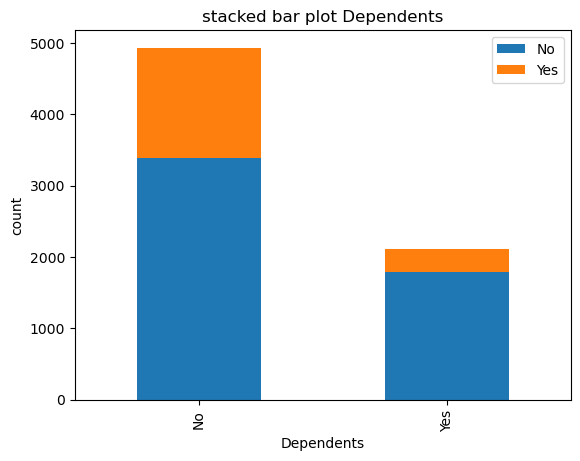

In [39]:
# stacked barplot cat v/s cat
a=df.groupby(['Dependents','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot Dependents")
plt.xlabel("Dependents")
plt.ylabel("count")
plt.legend()

# Insights
- The people don't have Dependents they are more churn  and people have Dependents 

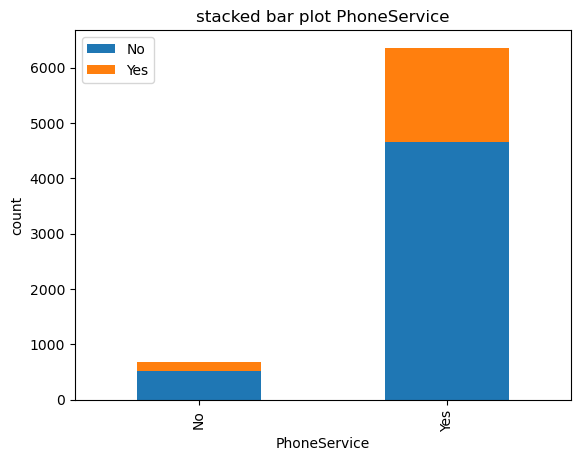

In [40]:
# stacked barplot cat v/s cat
a=df.groupby(['PhoneService','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot PhoneService")
plt.xlabel("PhoneService")
plt.ylabel("count")
plt.legend()

# Insights
- The phoneservice users are more churn nearly 1000

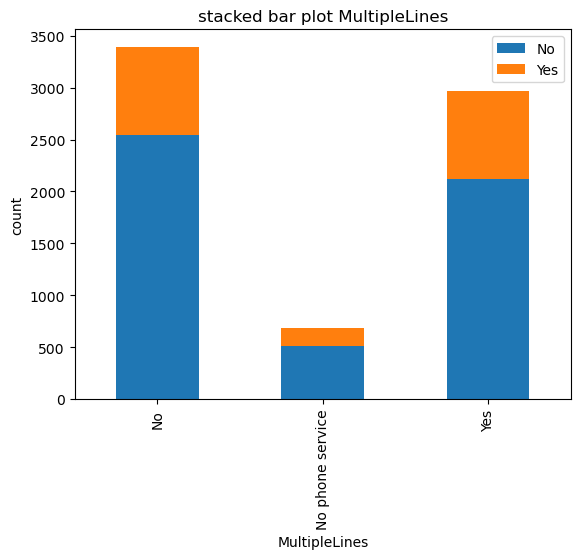

In [41]:
# stacked barplot cat v/s cat
a=df.groupby(['MultipleLines','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot MultipleLines")
plt.xlabel("MultipleLines")
plt.ylabel("count")
plt.legend()

# Insights
- The MultipleLines users and non-MultipleLines users are both are churn

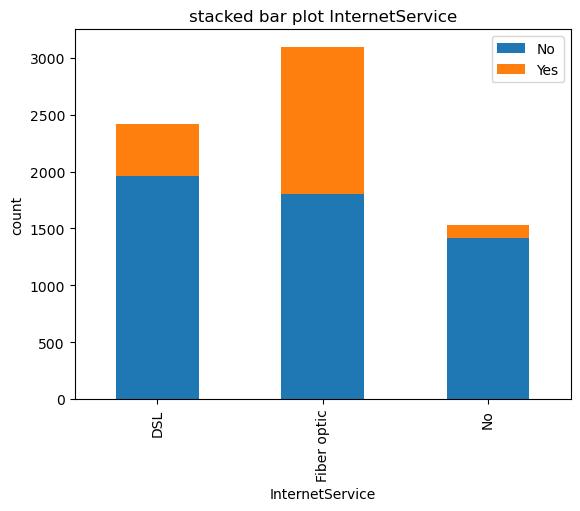

In [42]:
# stacked barplot cat v/s cat
a=df.groupby(['InternetService','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot InternetService")
plt.xlabel("InternetService")
plt.ylabel("count")
plt.legend()

# insights
- The fiber optic users are changing more to compare with dsl

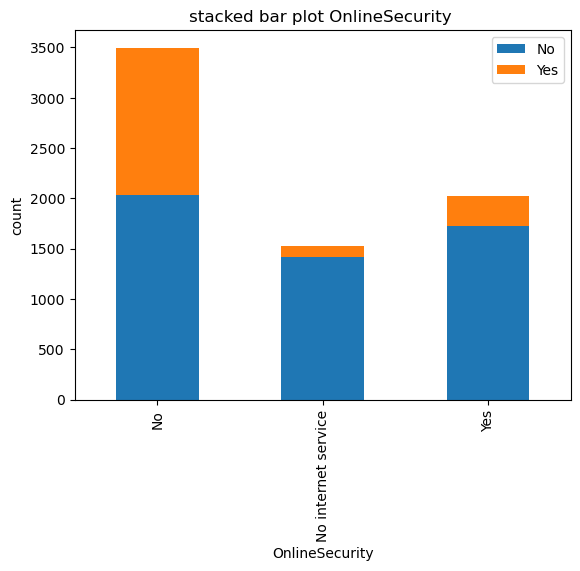

In [43]:
# stacked barplot cat v/s cat
a=df.groupby(['OnlineSecurity','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot OnlineSecurity ")
plt.xlabel("OnlineSecurity")
plt.ylabel("count")
plt.legend()

# Insights
- The people who didn't have OnlineSecurity they are churn 

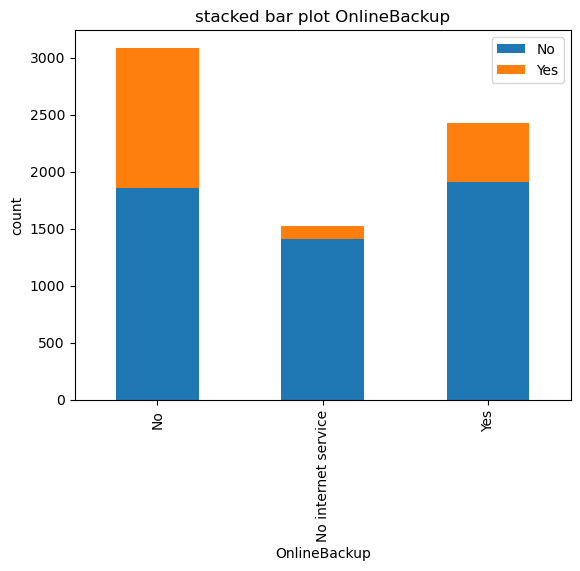

In [44]:
a=df.groupby(['OnlineBackup','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot OnlineBackup")
plt.xlabel("OnlineBackup")
plt.ylabel("count")
plt.legend()

# Insights
-  The people who didn't have OnlineBackup they are churn 1200 to 1300 churn 

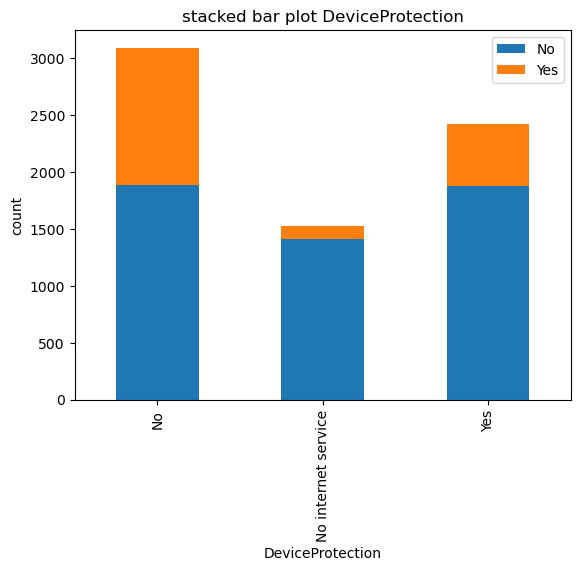

In [45]:
a=df.groupby(['DeviceProtection','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot DeviceProtection")
plt.xlabel("DeviceProtection")
plt.ylabel("count")
plt.legend()

# Insights
-  The people who didn't have device protcetion they are churn 1200 to 1300 churn 

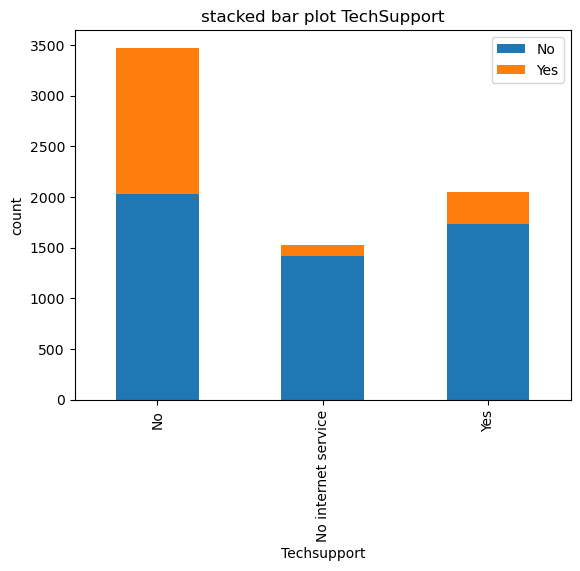

In [46]:
a=df.groupby(['TechSupport','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot TechSupport")
plt.xlabel("Techsupport")
plt.ylabel("count")
plt.legend()

# Insights
-  The people who didn't have techsupport they are churn count of 1400 churn

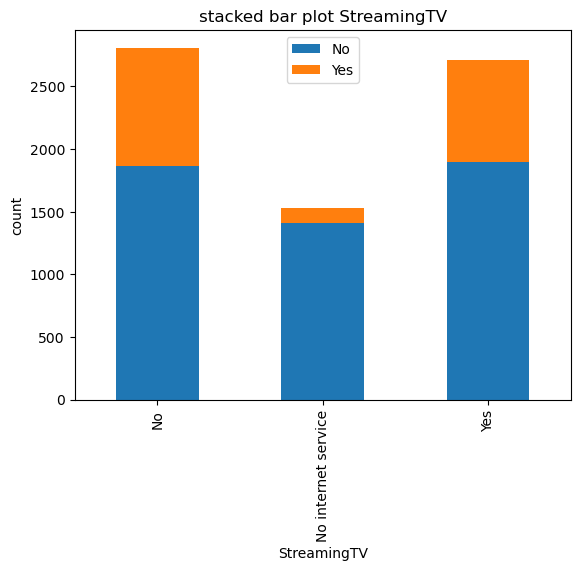

In [47]:
a=df.groupby(['StreamingTV','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot StreamingTV")
plt.xlabel("StreamingTV")
plt.ylabel("count")
plt.legend()

# Insights
- The users of StreamingTV and non-StreamingTV users both are churn are similar

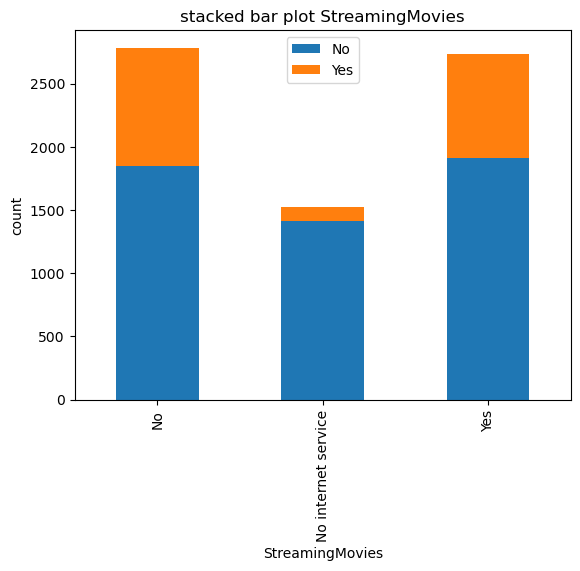

In [48]:
a=df.groupby(['StreamingMovies','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot StreamingMovies")
plt.xlabel("StreamingMovies")
plt.ylabel("count")
plt.legend()

# Insights
- The users of StreamingMovies and non-StreamingTV users both are churn are similar

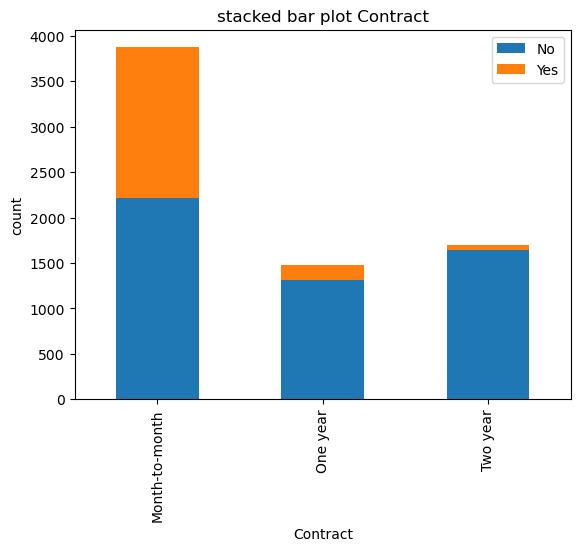

In [49]:
a=df.groupby(['Contract','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot Contract")
plt.xlabel("Contract")
plt.ylabel("count")
plt.legend()

# Insights
- In the contract month-to-month users are mostly churn to compare one year and two year 

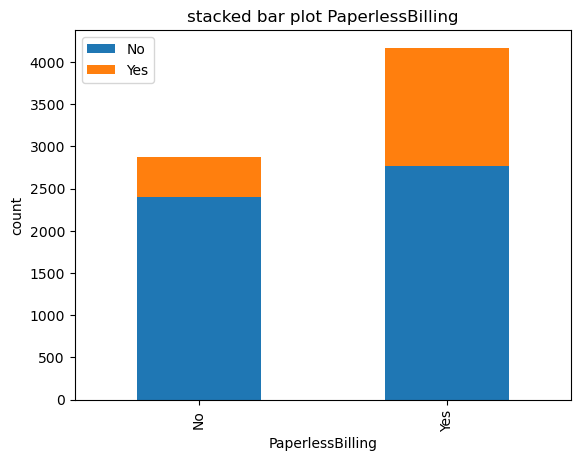

In [50]:
a=df.groupby(['PaperlessBilling','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot PaperlessBilling")
plt.xlabel("PaperlessBilling")
plt.ylabel("count")
plt.legend()

# Insights
- The paperless billing users are more churn to compare with others

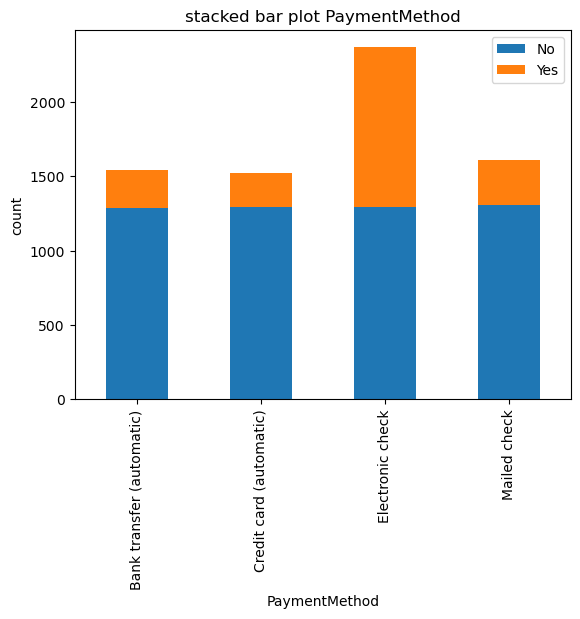

In [51]:
a=df.groupby(['PaymentMethod','Churn']).size().unstack()
a.plot.bar(stacked=True)
plt.title("stacked bar plot PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("count")
plt.legend()

# Insights
- The electronic check users are more churn to compare with others

In [15]:
clean2=df.select_dtypes(include=["int64","float64"])

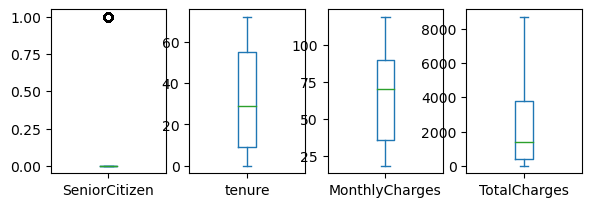

In [19]:
# boxplot for subplots of all numeric columns after removing outliers in bmi column
clean2.plot(kind="box",subplots=True,layout=(8,8),figsize=(14,20))
plt.title("box plot of all numeric data")
plt.show()

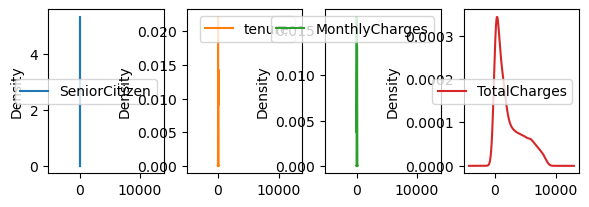

In [20]:
clean2.plot(kind="kde",subplots=True,layout=(8,8),figsize=(14,20))
plt.title("box plot of all numeric data")
plt.show()

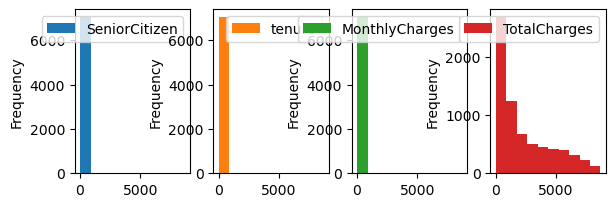

In [21]:
clean2.plot(kind="hist",subplots=True,layout=(8,8),figsize=(14,20))
plt.title("hist plot of all numeric data")
plt.show()

# conculsion :
- The total charges ,tenure are impacted the churn if the total charges are increasing the churn will increasing
- The tenure is also impacted the churn tenure increased the churn increased
- commonly some people are not using internet service
- The month-to-month users are churn and in every column 20 to 30 % are churn 
- Inthis case the company may gets loss

# Recommendations :
- To stop churn by providing offers are best way
- To focus on the tenure of plans and reduce the charges to stop churn 
- In contract replace month-to-month with best one 

In [17]:
import matplotlib.pyplot as plt

In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df.duplicated(keep="first").sum()

0

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## CRI ML frame work

In [35]:
# step 1
y =df["Churn"]
X = df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']]

In [36]:
X.head()


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,1,29.85,29.85
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,34,56.95,1889.50
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0,2,53.85,108.15
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,45,42.30,1840.75
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,2,70.70,151.65


In [23]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [37]:
# step 2 split data train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


In [38]:
# step 3 data preprocessing of numeric data
X_train_num = X_train.select_dtypes(["int64","float64"])
X_train_num.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6607,0,1,25.30,25.30
2598,0,7,75.15,525.00
2345,0,4,20.05,85.50
4093,0,29,76.00,2215.25
693,0,3,75.10,270.70


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescale = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns=X_train_num.columns,
                                  index=X_train_num.index)
X_train_num_rescale.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6607,-0.436091,-1.282882,-1.310046,-0.998652
2598,-0.436091,-1.037857,0.344832,-0.778236
2345,-0.436091,-1.160369,-1.484331,-0.972098
4093,-0.436091,-0.139429,0.373049,-0.032675
693,-0.436091,-1.201207,0.343172,-0.890407


In [49]:
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.159788,32.414237,64.762609,2289.327367
std,0.366444,24.489554,30.125932,2267.298905
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,403.562500
50%,0.000000,29.000000,70.400000,1397.562500
75%,0.000000,55.000000,89.850000,3814.250000
max,1.000000,72.000000,118.600000,8684.800000


In [48]:
X_train_num_rescale.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5.282000e+03,5.282000e+03,5.282000e+03,5.282000e+03
mean,8.143807e-17,4.896374e-17,4.262651e-17,6.824866e-17
std,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00
min,-4.360915e-01,-1.323720e+00,-1.544085e+00,-1.001519e+00
25%,-4.360915e-01,-9.561813e-01,-9.730947e-01,-8.318018e-01
50%,-4.360915e-01,-1.394293e-01,1.871452e-01,-3.933532e-01
75%,-4.360915e-01,9.223484e-01,8.328295e-01,6.726361e-01
max,2.293097e+00,1.616588e+00,1.787247e+00,2.821012e+00


In [40]:
# categorical data preprocessing 
X_train_cat = X_train.select_dtypes(["object"])
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6607,Male,No,Yes,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2598,Female,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
2345,Female,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic)
4093,Female,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)
693,Female,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [41]:
X_train_cat.shape

(5282, 15)

In [ ]:
# one hot encoding

In [42]:
# creating index to one hot encoding
X_train_cat_one = pd.DataFrame(index=X_train_cat.index)
X_train_cat_one.head()

""
6607
2598
2345
4093
693


In [43]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop= "first",sparse= False)
X_train_cat_one = pd.DataFrame(encoder.fit_transform(X_train_cat),
                              columns=encoder.get_feature_names_out(X_train_cat.columns),
                              index=X_train_cat.index)
X_train_cat_one.head()

C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6607,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2598,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2345,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4093,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
693,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## conbcat of cat and num

In [44]:
X_train_transform = pd.concat([X_train_cat_one ,X_train_num_rescale],axis=1)
X_train_transform.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6607,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.436091,-1.282882,-1.310046,-0.998652
2598,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.436091,-1.037857,0.344832,-0.778236
2345,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.436091,-1.160369,-1.484331,-0.972098
4093,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,-0.436091,-0.139429,0.373049,-0.032675
693,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,-0.436091,-1.201207,0.343172,-0.890407


## test data preprocessing

In [45]:
X_test.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
185,Female,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,1,24.80,24.80
2715,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),0,41,25.25,996.45
3825,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0,52,19.35,1031.70
1807,Female,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,0,1,76.35,76.35
132,Male,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),0,67,50.55,3260.10


In [46]:
X_test_num =X_test.select_dtypes(["int64","float64"])
X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
185,0,1,24.80,24.80
2715,0,41,25.25,996.45
3825,0,52,19.35,1031.70
1807,0,1,76.35,76.35
132,0,67,50.55,3260.10


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_num_rescale = pd.DataFrame(scaler.fit_transform(X_test_num),
                                   columns=X_test_num.columns,
                                  index=X_test_num.index)
X_test_num_rescale.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
185,-0.451321,-1.261405,-1.332757,-0.989314
2715,-0.451321,0.353612,-1.317748,-0.559196
3825,-0.451321,0.797741,-1.514531,-0.543592
1807,-0.451321,-1.261405,0.386598,-0.966494
132,-0.451321,1.403372,-0.473913,0.442849


In [52]:
X_test_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.169222,32.241908,64.758944,2259.689821
std,0.375054,24.774585,29.990692,2259.672141
min,0.000000,0.000000,18.700000,18.900000
25%,0.000000,8.000000,35.650000,391.700000
50%,0.000000,28.000000,70.100000,1387.450000
75%,0.000000,55.000000,89.850000,3723.650000
max,1.000000,72.000000,118.750000,8672.450000


In [53]:
X_test_num_rescale.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1.761000e+03,1.761000e+03,1.761000e+03,1.761000e+03
mean,2.824417e-16,-1.155615e-16,-3.177470e-17,7.502359e-17
std,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00
min,-4.513214e-01,-1.301780e+00,-1.536211e+00,-9.919255e-01
25%,-4.513214e-01,-9.787770e-01,-9.708750e-01,-8.268989e-01
50%,-4.513214e-01,-1.712688e-01,1.781410e-01,-3.861125e-01
75%,-4.513214e-01,9.188673e-01,8.368658e-01,6.480480e-01
max,2.215716e+00,1.605249e+00,1.800772e+00,2.838722e+00


##  test categorical data preprocessing 

In [54]:
X_test_cat = X_test.select_dtypes(["object"])
X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
185,Female,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2715,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic)
3825,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1807,Female,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check
132,Male,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic)


In [55]:
X_test_cat_one = pd.DataFrame(index=X_test_cat.index)
X_test_cat_one.head()

""
185
2715
3825
1807
132


In [56]:
X_test_cat_one = pd.DataFrame(encoder.transform(X_test_cat),
                             columns=encoder.get_feature_names_out(X_test_cat.columns),
                             index=X_test_cat.index)
X_test_cat_one.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2715,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3825,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1807,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
132,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## concat of test data

In [57]:
X_test_transform = pd.concat([X_test_cat_one,X_test_num_rescale],axis=1)
X_test_transform.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
185,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.451321,-1.261405,-1.332757,-0.989314
2715,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.451321,0.353612,-1.317748,-0.559196
3825,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.451321,0.797741,-1.514531,-0.543592
1807,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.451321,-1.261405,0.386598,-0.966494
132,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.451321,1.403372,-0.473913,0.442849


## logestic reg

In [58]:
# model building and step 4 

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_transform,y_train)

y_test_pred_l = reg.predict(X_test_transform)

from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred_l)


0.8131743327654741

## KNN

In [59]:

from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier()
reg.fit(X_train_transform,y_train)

y_test_pred_k = reg.predict(X_test_transform)

from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred_l)


0.8131743327654741

## decision tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier()
reg.fit(X_train_transform,y_train)

y_test_pred_d = reg.predict(X_test_transform)

from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred_l)


0.8131743327654741

## random forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier()
reg.fit(X_train_transform,y_train)

y_test_pred_r = reg.predict(X_test_transform)

from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred_l)


0.8131743327654741

1. The all above models are given the similar predictions
2. The best algorithm is logistic regression

## Adaboostclassifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier
reg = AdaBoostClassifier()
reg.fit(X_train_transform,y_train)

y_test_pred_k = reg.predict(X_test_transform)

from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred_l)


0.8131743327654741

# `Conculsion :`
- The all models are predictions are mostly equal 
- All models with accuracy of 81 %